In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')
test_df = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')

In [3]:
print(train_df.shape, test_df.shape)

(13636, 15) (4546, 14)


# **Exploratory Data Analysis**

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


# Metadata and Descriptive Statistics

In [5]:
train_df.head(5)

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [6]:
test_df.head(5)

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad...."
2,156,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,0,0,0,100,I use a small ladle to fill muffin cups.
3,18,89,1324,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,0,4,3,212,I made this and followed the instructions as d...
4,27,70,32264,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,0,0,1,100,Very Good! I used corn tortillas. Used fresh...


Here we can observe that the target variable "Rating" is the only difference in the train_data and test_data

**We seek to identify the data types of columns in the dataset, distinguishing between numerical columns that contain quantitative values and categorical columns that represent qualitative attributes.**

In [7]:
Numerical_Features = train_df.select_dtypes(include=['number']).columns
Categorical_features = train_df.select_dtypes(include=['object']).columns
print(f"Numerical Features: {Numerical_Features}")
print(f"Categorical Features: {Categorical_features}")
total_features = list(Numerical_Features) + list(Categorical_features)

Numerical Features: Index(['ID', 'RecipeNumber', 'RecipeCode', 'UserReputation',
       'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount',
       'Rating', 'BestScore'],
      dtype='object')
Categorical Features: Index(['RecipeName', 'CommentID', 'UserID', 'UserName', 'Recipe_Review'], dtype='object')


In [8]:
numerical_features = ['UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']
#['RecipeNumber', 'RecipeCode'])-->These are treated as categorical due to their nature
date_time_type_feature = ['CreationDatetime']
categorical_features = ['CommentID', 'UserID', 'UserName','RecipeNumber', 'RecipeCode']
text_features = ['RecipeName', 'Recipe_Review']

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

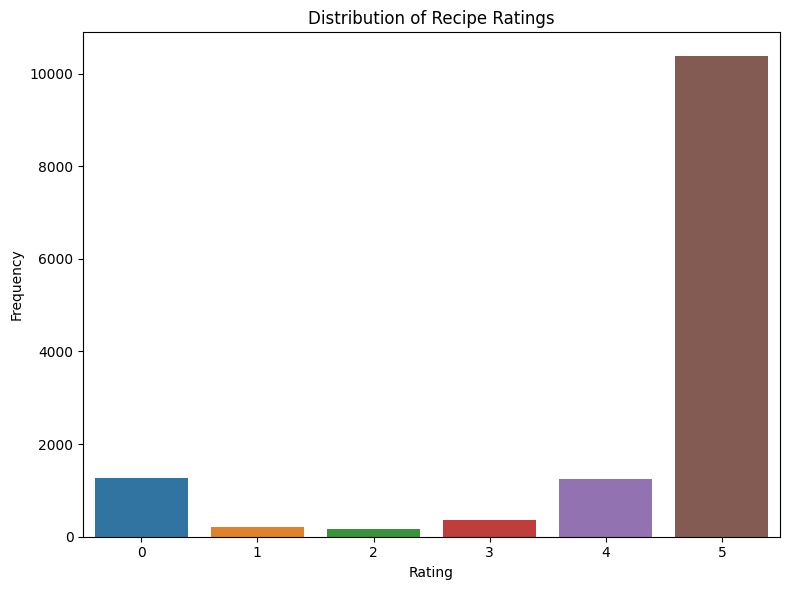

In [10]:
# Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=train_df)
plt.title('Distribution of Recipe Ratings')
plt.ylabel('Frequency')
plt.xlabel('Rating')

plt.tight_layout()
plt.show()

In [11]:
train_df['Rating'].value_counts()

Rating
5    10371
0     1272
4     1241
3      368
1      210
2      174
Name: count, dtype: int64

Skewness of the target variable 'Rating': -2.128448045999372


Text(0.5, 1.0, 'Boxplot of Rating')

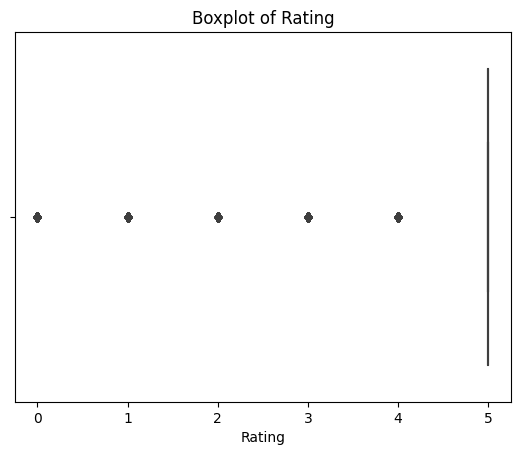

In [12]:
target_variable = 'Rating'
# Print skewness of the target variable
target_skewness = train_df[target_variable].skew()
print(f"Skewness of the target variable '{target_variable}': {target_skewness}")

# Visualize skewness using box plot
sns.boxplot(x=train_df[target_variable])
plt.title(f'Boxplot of {target_variable}')

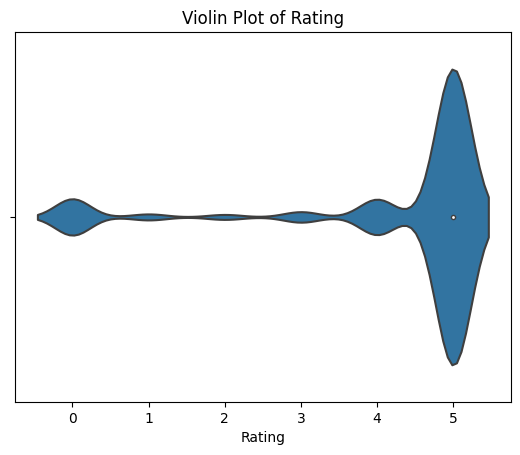

In [13]:
# Visualize skewness using violin plot
sns.violinplot(x=train_df[target_variable])
plt.title(f'Violin Plot of {target_variable}')
plt.show()

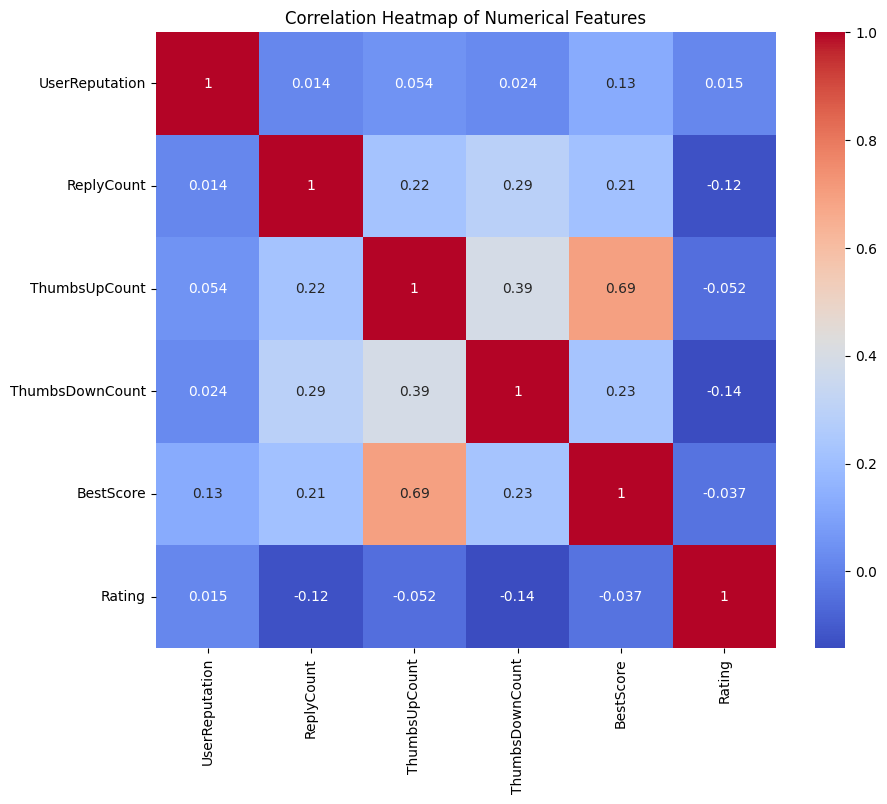

In [14]:
# Correlation Heatmap of Numerical Features
numerical_features_corr = ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']
correlation_matrix = train_df[numerical_features_corr + ['Rating']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [15]:
print("Correlation values with Rating:")
print(correlation_matrix['Rating'].drop('Rating'))

Correlation values with Rating:
UserReputation     0.015038
ReplyCount        -0.124860
ThumbsUpCount     -0.051752
ThumbsDownCount   -0.142273
BestScore         -0.036719
Name: Rating, dtype: float64


In [16]:
# Check skewness of numerical features
skewness = train_df[numerical_features].skew()
print("Skewness of numerical features:")
print(skewness)

Skewness of numerical features:
UserReputation       33.151661
CreationTimestamp     5.447766
ReplyCount           11.408240
ThumbsUpCount         7.886147
ThumbsDownCount      16.660097
BestScore             3.393192
dtype: float64


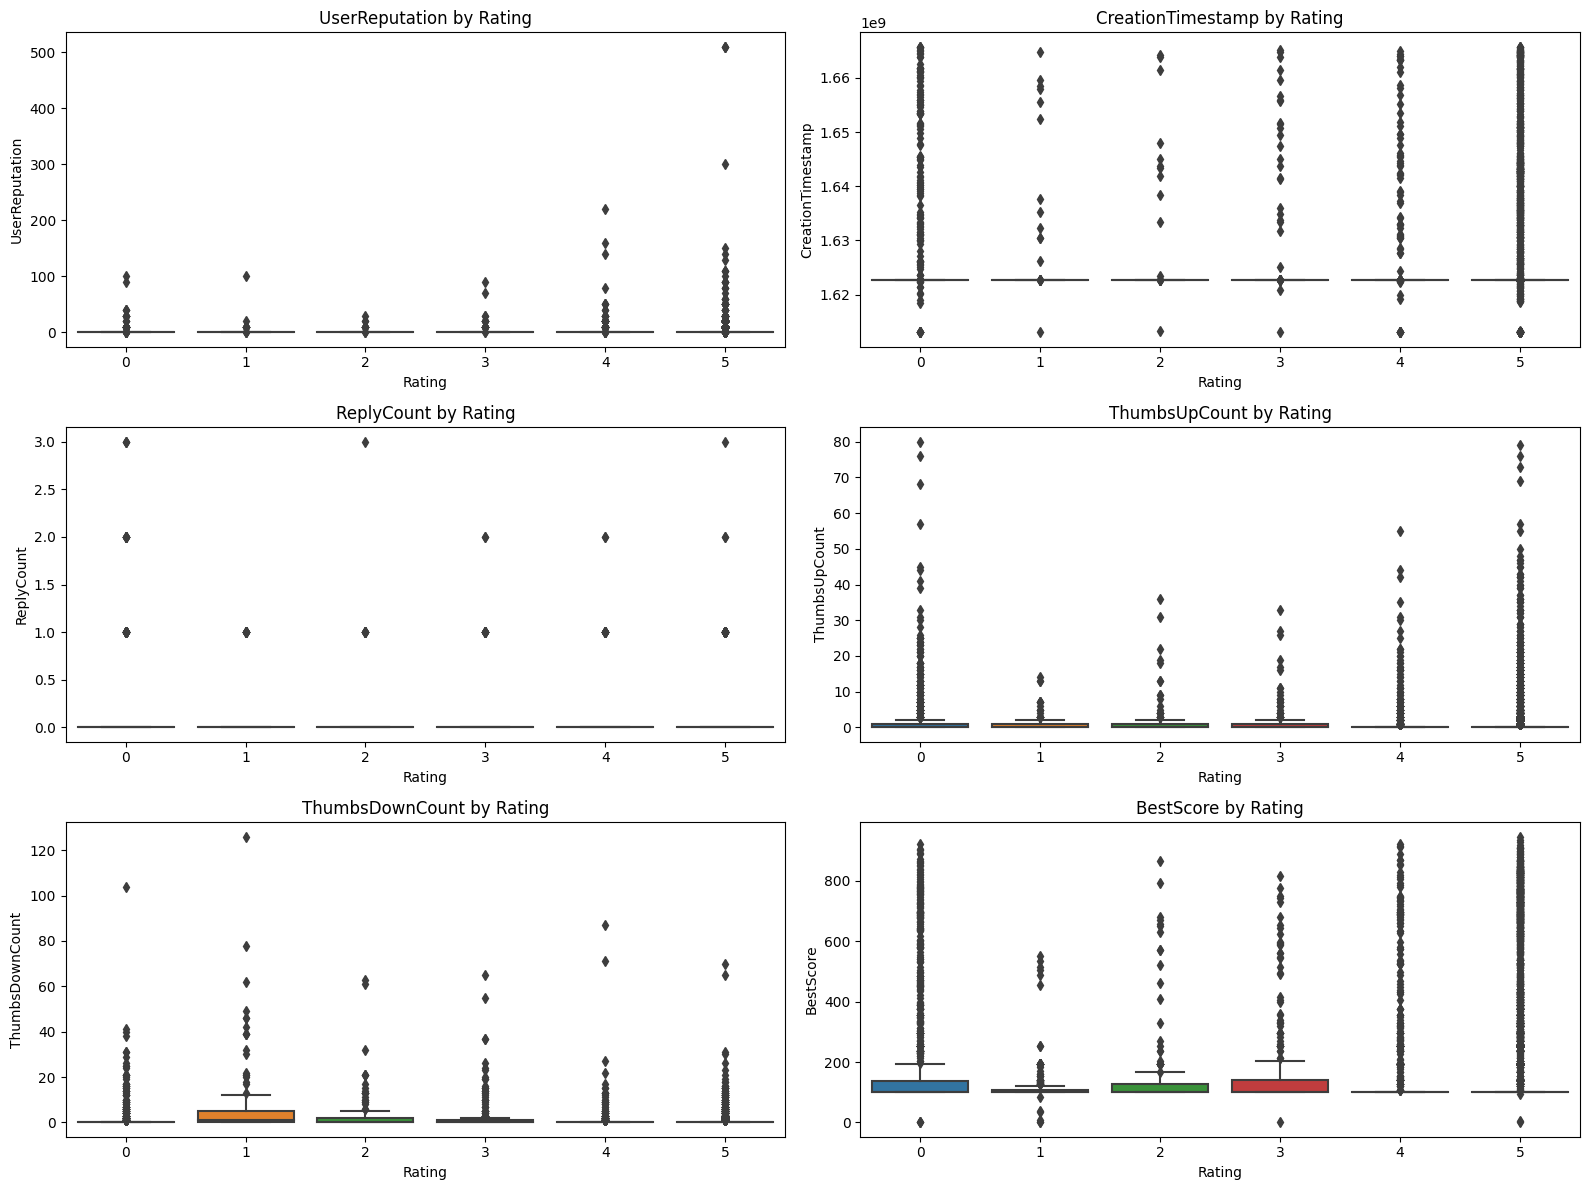

In [17]:
# Relationship between numerical features and the target variable (Rating)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
axes = axes.flatten()

for ax, feature in zip(axes, numerical_features):
    sns.boxplot(x='Rating', y=feature, data=train_df, ax=ax)
    ax.set_title(f'{feature} by Rating')
    ax.set_ylabel(feature)
    ax.set_xlabel('Rating')
plt.tight_layout()
plt.show()

# **Data Preprocessing**

Checking the missing or NaN values

In [18]:
 train_df.isnull().sum()    # Counting the missing values

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

In [19]:
 test_df.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
dtype: int64

In [20]:
train_df['Recipe_Review'].fillna(' ', inplace=True)

## Feature Engineering

**Time Features from CreationTimestamp**

In [21]:
# Convert unix timestamp to datetime
train_df['CreationDatetime'] = pd.to_datetime(train_df['CreationTimestamp'], unit='s')
# Extract day of week and hour of day
train_df['DayOfWeek'] = train_df['CreationDatetime'].dt.dayofweek
train_df['HourOfDay'] = train_df['CreationDatetime'].dt.hour

test_df['CreationDatetime'] = pd.to_datetime(test_df['CreationTimestamp'], unit='s')
# Extract day of week and hour of day
test_df['DayOfWeek'] = test_df['CreationDatetime'].dt.dayofweek
test_df['HourOfDay'] = test_df['CreationDatetime'].dt.hour

I consider DayofWeek as a categorical feature

In [22]:
test_df.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review,CreationDatetime,DayOfWeek,HourOfDay
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...,2021-06-03 11:00:43,3,11
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad....",2021-06-03 10:54:45,3,10
2,156,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,0,0,0,100,I use a small ladle to fill muffin cups.,2021-06-03 11:05:07,3,11
3,18,89,1324,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,0,4,3,212,I made this and followed the instructions as d...,2021-06-02 15:47:52,2,15
4,27,70,32264,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,0,0,1,100,Very Good! I used corn tortillas. Used fresh...,2021-06-03 11:07:40,3,11


**Interaction Features**

In [23]:
# Total Interaction Count
train_df['TotalInteractions'] = train_df['ReplyCount'] + train_df['ThumbsUpCount'] + train_df['ThumbsDownCount']
test_df['TotalInteractions'] = test_df['ReplyCount'] + test_df['ThumbsUpCount'] + test_df['ThumbsDownCount']

# Thumbs Ratio
train_df['ThumbsRatio'] = train_df['ThumbsUpCount'] / (train_df['ThumbsDownCount'] + 1) # Adding 1 to avoid division by zero
test_df['ThumbsRatio'] = test_df['ThumbsUpCount'] / (test_df['ThumbsDownCount'] + 1) 

In [24]:
test_df.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review,CreationDatetime,DayOfWeek,HourOfDay,TotalInteractions,ThumbsRatio
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,0,0,0,100,This was so good!! The pumpkin was perfect as...,2021-06-03 11:00:43,3,11,0,0.0
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,0,0,1,100,"So good! Could not stop eating them, so bad....",2021-06-03 10:54:45,3,10,1,0.0
2,156,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,0,0,0,100,I use a small ladle to fill muffin cups.,2021-06-03 11:05:07,3,11,0,0.0
3,18,89,1324,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,0,4,3,212,I made this and followed the instructions as d...,2021-06-02 15:47:52,2,15,7,1.0
4,27,70,32264,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,0,0,1,100,Very Good! I used corn tortillas. Used fresh...,2021-06-03 11:07:40,3,11,1,0.0


In [25]:
# Drop unnecessary columns
train_df.drop(['CreationDatetime','ThumbsUpCount', 'ThumbsDownCount', 'ReplyCount', ], axis=1, inplace=True)
test_df.drop(['CreationDatetime','ThumbsUpCount', 'ThumbsDownCount', 'ReplyCount', ], axis=1, inplace=True)

In [26]:
test_df.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,BestScore,Recipe_Review,DayOfWeek,HourOfDay,TotalInteractions,ThumbsRatio
0,86,45,41384,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,100,This was so good!! The pumpkin was perfect as...,3,11,0,0.0
1,102,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,100,"So good! Could not stop eating them, so bad....",3,10,1,0.0
2,156,53,3143,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,100,I use a small ladle to fill muffin cups.,3,11,0,0.0
3,18,89,1324,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,212,I made this and followed the instructions as d...,2,15,7,1.0
4,27,70,32264,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,100,Very Good! I used corn tortillas. Used fresh...,3,11,1,0.0


After the feature engineering the new features are:

In [27]:
numerical_features = ['UserReputation','TotalInteractions','BestScore','ThumbsRatio', 'HourOfDay']
categorical_features = ['CommentID', 'UserID', 'UserName','RecipeNumber', 'RecipeCode', 'DayOfWeek']
text_features = ['RecipeName', 'Recipe_Review']
#target_feature = ['Rating']

### Handling the object type data

In [28]:
for feature in categorical_features:
    unique_classes_count = train_df[feature].nunique()
    print(f"Number of unique entries for {feature}: {unique_classes_count}")

Number of unique entries for CommentID: 13636
Number of unique entries for UserID: 10783
Number of unique entries for UserName: 10620
Number of unique entries for RecipeNumber: 100
Number of unique entries for RecipeCode: 100
Number of unique entries for DayOfWeek: 7


In the analysis of a dataset with 13,636 entries, only the 'RecipeNumber' and 'RecipeCode' categorical features, boasting 100 unique entries, stood out as significant. 'CommentID' encompassed the entire dataset with 13,636 unique entries, while 'UserID' and 'UserName' exhibited 10,783 and 10,620 unique entries, respectively. This highlights 'RecipeNumber' and 'RecipeCode' as the primary categorical features influencing the dataset's characteristics.

Upon thorough examination of the dataset, it is evident that the columns **'RecipeName', 'RecipeCode', and 'RecipeNumber' each represent a single feature** with 100 unique values. Hence, I will focus solely on the 'RecipeCode' feature.

**Encoding Categorical Feature using One Hot Encoder**

In [29]:
from sklearn.preprocessing import OneHotEncoder
# Apply One-Hot Encoding for the 'RecipeCode' feature
encoder = OneHotEncoder(sparse=False)
encoded_recipe_code = encoder.fit_transform(train_df[['RecipeCode']])
encoded_recipe_code_df = pd.DataFrame(encoded_recipe_code, columns=[f'RecipeCode_{code}' for code in encoder.categories_[0]])
# Drop original 'RecipeCode' column
train_df.drop('RecipeCode', axis=1, inplace=True)
# Concatenate the encoded recipe code dataframe with the original dataframe
train_df = pd.concat([train_df, encoded_recipe_code_df], axis=1)

# Apply One-Hot Encoding for the 'RecipeCode' feature in test data
encoded_recipe_code = encoder.transform(test_df[['RecipeCode']])  # Use 'test_df' instead of 'train_df'
encoded_recipe_code_df = pd.DataFrame(encoded_recipe_code, columns=[f'RecipeCode_{code}' for code in encoder.categories_[0]])
test_df.drop('RecipeCode', axis=1, inplace=True)
test_df = pd.concat([test_df, encoded_recipe_code_df], axis=1)  # Concatenate 'test_df' with 'encoded_recipe_code_df'



/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
test_df.head()

,ID,RecipeNumber,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,BestScore,Recipe_Review,...,RecipeCode_42386,RecipeCode_42873,RecipeCode_43675,RecipeCode_45495,RecipeCode_46655,RecipeCode_74724,RecipeCode_82745,RecipeCode_100276,RecipeCode_141947,RecipeCode_191775
0,86,45,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,100,This was so good!! The pumpkin was perfect as...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,102,53,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,100,"So good! Could not stop eating them, so bad....",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,156,53,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,100,I use a small ladle to fill muffin cups.,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18,89,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,212,I made this and followed the instructions as d...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27,70,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,100,Very Good! I used corn tortillas. Used fresh...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
from sklearn.preprocessing import OneHotEncoder

# Apply One-Hot Encoding for the 'DayOfWeek' feature
encoder_day_of_week = OneHotEncoder(sparse=False)
encoded_day_of_week = encoder_day_of_week.fit_transform(train_df[['DayOfWeek']])
encoded_day_of_week_df = pd.DataFrame(encoded_day_of_week, columns=[f'DayOfWeek_{day}' for day in encoder_day_of_week.categories_[0]])

# Drop original 'DayOfWeek' column
train_df.drop('DayOfWeek', axis=1, inplace=True)

# Concatenate the encoded 'DayOfWeek' dataframe with the original dataframe
train_df = pd.concat([train_df, encoded_day_of_week_df], axis=1)

# Apply One-Hot Encoding for the 'DayOfWeek' feature in test data
encoded_day_of_week_test = encoder_day_of_week.transform(test_df[['DayOfWeek']])
encoded_day_of_week_df_test = pd.DataFrame(encoded_day_of_week_test, columns=[f'DayOfWeek_{day}' for day in encoder_day_of_week.categories_[0]])

test_df.drop('DayOfWeek', axis=1, inplace=True)
test_df = pd.concat([test_df, encoded_day_of_week_df_test], axis=1)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [32]:
test_df.head()

,ID,RecipeNumber,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,BestScore,Recipe_Review,...,RecipeCode_100276,RecipeCode_141947,RecipeCode_191775,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,86,45,Black Bean ‘n’ Pumpkin Chili,sp_aUSaElGf_41384_c_341929,u_1oKc4U6bh65cEli8Z8eTIf98Vpr,kalloween,1,1622718043,100,This was so good!! The pumpkin was perfect as...,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,102,53,Pumpkin Bars,sp_aUSaElGf_3143_c_274545,u_1oKW5seFLQMSwAeOfBVmwJizy5D,chocolate desert,1,1622717685,100,"So good! Could not stop eating them, so bad....",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,156,53,Pumpkin Bars,sp_aUSaElGf_3143_c_398512,u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz,Vantreesta,1,1622718307,100,I use a small ladle to fill muffin cups.,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,18,89,Porcupine Meatballs,sp_aUSaElGf_1324_c_431662,u_1oKWCP33NVk4Osfpu4VJuIckEF0,Roberta L.Beauchamp,1,1622648872,212,I made this and followed the instructions as d...,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,27,70,Easy Chicken Enchiladas,sp_aUSaElGf_32264_c_423935,u_1oKVhIJMuUlrSCVkbO1jheVTol8,fhquilting,1,1622718460,100,Very Good! I used corn tortillas. Used fresh...,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [33]:
# Drop specified features from train_data
train_df.drop(['UserName', 'CommentID', 'UserID', 'RecipeName', 'RecipeNumber'], axis=1, inplace=True)
test_df.drop(['UserName', 'CommentID', 'UserID', 'RecipeName', 'RecipeNumber'], axis=1, inplace=True)

In [34]:
test_df.head()

,ID,UserReputation,CreationTimestamp,BestScore,Recipe_Review,HourOfDay,TotalInteractions,ThumbsRatio,RecipeCode_386,RecipeCode_414,...,RecipeCode_100276,RecipeCode_141947,RecipeCode_191775,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,86,1,1622718043,100,This was so good!! The pumpkin was perfect as...,11,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,102,1,1622717685,100,"So good! Could not stop eating them, so bad....",10,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,156,1,1622718307,100,I use a small ladle to fill muffin cups.,11,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,18,1,1622648872,212,I made this and followed the instructions as d...,15,7,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,27,1,1622718460,100,Very Good! I used corn tortillas. Used fresh...,11,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Handling the Numerical Features

**Standardizing the numerical features using StandardScaler.**

In [35]:
for feature in numerical_features:
    unique_classes_count = train_df[feature].nunique()
    print(f"Number of unique entries for {feature}: {unique_classes_count}")

Number of unique entries for UserReputation: 20
Number of unique entries for TotalInteractions: 81
Number of unique entries for BestScore: 525
Number of unique entries for ThumbsRatio: 250
Number of unique entries for HourOfDay: 24


In [36]:
# Preprocessing: Scale new numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

### Handling the Text Feature

Preprocessing text data in 'Recipe_Review' column by replacing non-alphanumeric characters with spaces, converting to lowercase, and handling missing values for both training and test datasets.

In [37]:
import re
train_df['Recipe_Review'] = train_df['Recipe_Review'].fillna('')
train_df['Recipe_Review'] = train_df['Recipe_Review'].apply(lambda x: re.sub(r'[^\w\s\d]', '', str(x).lower()))
test_df['Recipe_Review'] = test_df['Recipe_Review'].fillna('')
test_df['Recipe_Review'] = test_df['Recipe_Review'].apply(lambda x: re.sub(r'[^\w\s\d]', '', str(x).lower()))

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
text_data = train_df['Recipe_Review']
vectorizer = TfidfVectorizer(max_features=1000)
text_matrix = vectorizer.fit_transform(text_data)

text_df = pd.DataFrame(text_matrix.toarray(), columns=vectorizer.get_feature_names_out())
# Replace the 'Recipe_Review' column with the new DataFrame
train_df = pd.concat([train_df.drop('Recipe_Review', axis=1), text_df], axis=1)

text_data_test = test_df['Recipe_Review']
text_matrix_test = vectorizer.transform(text_data_test)
text_df_test = pd.DataFrame(text_matrix_test.toarray(), columns=vectorizer.get_feature_names_out())
test_df = pd.concat([test_df.drop('Recipe_Review', axis=1), text_df_test], axis=1)

**Identifying the outliers**

In [39]:
Q1 = train_df['Rating'].quantile(0.25)
Q3 = train_df['Rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying and removing outliers
outliers_index = (train_df['Rating'] < lower_bound) | (train_df['Rating'] > upper_bound)
cleaned_data = train_df[~outliers_index]

# the number of removed outliers
num_outliers_removed = sum(outliers_index)
print(f'Number of outliers removed: {num_outliers_removed}')

Number of outliers removed: 3265


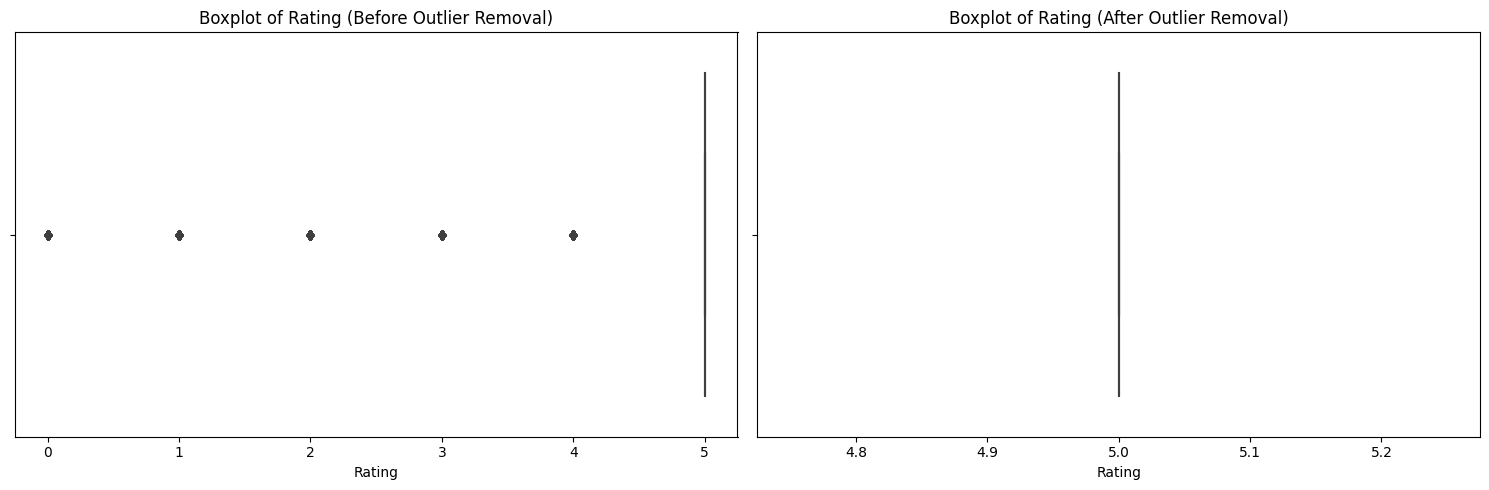

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot before outlier removal
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=train_df['Rating'])
plt.title('Boxplot of Rating (Before Outlier Removal)')

# Boxplot after outlier removal
plt.subplot(1, 2, 2)
sns.boxplot(x=cleaned_data['Rating'])
plt.title('Boxplot of Rating (After Outlier Removal)')

plt.tight_layout()
plt.show()


solver needs samples of at least 2 classes in the data, but the data contains only one class: 5. It is personally believed that accurately identifying low ratings is crucial, as this area warrants focused attention. So the entire train_data is used instead of removing those outliers

In [41]:
test_df.head()

,ID,UserReputation,CreationTimestamp,BestScore,HourOfDay,TotalInteractions,ThumbsRatio,RecipeCode_386,RecipeCode_414,RecipeCode_957,...,yes,yesterday,yet,yogurt,you,you39re,your,yum,yummy,zucchini
0,86,-0.115041,1622718043,-0.376842,0.176516,-0.264443,-0.30327,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,102,-0.115041,1622717685,-0.376842,-0.306714,-0.104803,-0.30327,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.123365,0.0,0.0,0.0,0.0,0.0
2,156,-0.115041,1622718307,-0.376842,0.176516,-0.264443,-0.30327,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,18,-0.115041,1622648872,0.417587,2.109435,0.853035,0.29117,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,27,-0.115041,1622718460,-0.376842,0.176516,-0.104803,-0.30327,0.0,0.0,0.0,...,0.0,0.0,0.172545,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [42]:
from sklearn.model_selection import train_test_split

X = train_df.drop('Rating', axis=1)
y = train_df['Rating']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

# **Model Building**

**Dummy Classifier**

In [43]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Dummy Classifier (stratified strategy)
dummy_model = DummyClassifier(strategy="stratified")
dummy_model.fit(X_train, y_train)
y_pred_dummy = dummy_model.predict(X_val)
acc_dummy = accuracy_score(y_val, y_pred_dummy)

print("Accuracy Score for Dummy Classifier (stratified strategy):", acc_dummy)


Accuracy Score for Dummy Classifier (stratified strategy): 0.5989736070381232


The stratified strategy generates random predictions based on the distribution of the training data labels.

**Logistic Regression**

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_pred_log = logreg_model.predict(X_val)
acc_log =  accuracy_score(y_val, y_pred_log)
print("accuracy Score:", acc_log)

accuracy Score: 0.7606304985337243


**K-Nearest Neighbors (KNN) classifier** using Grid Search Cross-Validation.

**Decision Tree classifier (CART)**

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

cart_model = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=6)
cart_model.fit(X_train, y_train)
y_pred_cart = cart_model.predict(X_val)
accuracy_cart = accuracy_score(y_val, y_pred_cart)
print("CART Accuracy:", accuracy_cart)


CART Accuracy: 0.7551319648093842


Decision Tree classifier as the base estimator for the **Bagging model**.

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, max_samples=0.8)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_val)
accuracy_bagging = accuracy_score(y_val, y_pred_bagging)
print("Bagging Accuracy:", accuracy_bagging)

print(classification_report(y_val, y_pred_bagging))


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Accuracy: 0.7771260997067448
              precision    recall  f1-score   support

           0       0.63      0.15      0.24       254
           1       0.43      0.07      0.12        42
           2       1.00      0.11      0.21        35
           3       0.89      0.11      0.19        74
           4       0.50      0.06      0.10       248
           5       0.78      0.99      0.87      2075

    accuracy                           0.78      2728
   macro avg       0.70      0.25      0.29      2728
weighted avg       0.74      0.78      0.71      2728



Decision Tree classifier as the base estimator for the **AdaBoost model.**

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adaboost_classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier())
adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_val)
accuracy_adaboost = accuracy_score(y_val, y_pred_adaboost)
print("AdaBoost Accuracy (Default Hyperparameters):", accuracy_adaboost)
print(classification_report(y_val,y_pred_adaboost))

AdaBoost Accuracy (Default Hyperparameters): 0.6781524926686217
              precision    recall  f1-score   support

           0       0.24      0.24      0.24       254
           1       0.12      0.14      0.13        42
           2       0.12      0.11      0.12        35
           3       0.16      0.14      0.14        74
           4       0.18      0.14      0.16       248
           5       0.82      0.84      0.83      2075

    accuracy                           0.68      2728
   macro avg       0.27      0.27      0.27      2728
weighted avg       0.67      0.68      0.67      2728



AdaBoost adjusts the weights of misclassified examples in each iteration to focus more on those examples in subsequent iterations. In the presence of class imbalance, misclassifying a minority class example may not significantly affect the overall error rate, leading to insufficient adjustments to the model.

Reasoning:
AdaBoost focuses on boosting the performance of weak learners.    
Lower accuracy suggests potential sensitivity to noisy data or outliers.

**XGBoost** classifier

**XGBoost Classifier** using Random Search Cross-Validation

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
}

xgb_classifier = XGBClassifier(random_state=42)
xgb_rand_search = RandomizedSearchCV(xgb_classifier, xgb_param_grid, scoring='accuracy', cv=5, n_iter=9)
xgb_rand_search.fit(X, y)

best_xgb_model = xgb_rand_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)

print("Best XGBoost Accuracy:", accuracy_xgb)
print("Best XGBoost Parameters:", xgb_rand_search.best_params_)
print(classification_report(y_val, y_pred_xgb))


In [48]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=300)
xgb_classifier.fit(X, y)
y_pred = xgb_classifier.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8892961876832844


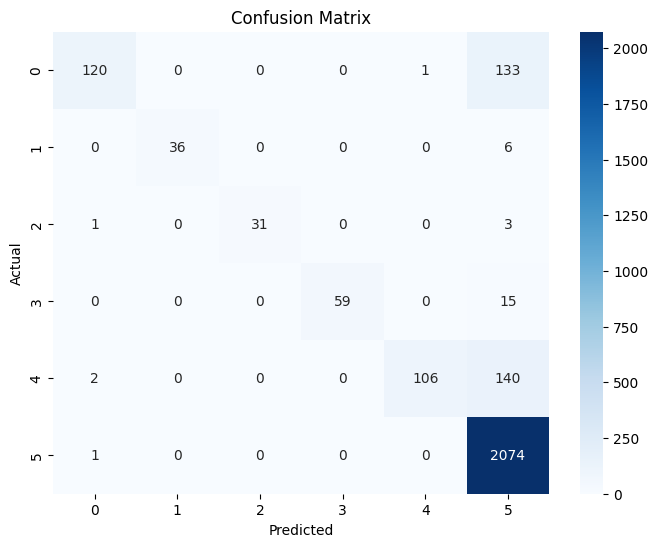

In [49]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

XGBoost is an ensemble method known for its efficiency and high predictive performance.

**Analysis:**

The model shows high accuracy, primarily driven by excellent performance on Class 5.    
Classes 0, 1, 2, 3, and 4 have lower precision, recall, and F1-scores, indicating challenges in correctly identifying instances of these classes.    
The macro-average metrics highlight the class imbalance and the need for improvement in predicting minority classes.    
Class 5 dominates the dataset, leading to a skewed overall accuracy. Care should be taken to ensure the model generalizes well across all classes.    

In [50]:
y_pred = xgb_classifier.predict(test_df)

In [51]:
submission = pd.DataFrame(columns = ["ID","Rating"])
submission["ID"] = [i for i in range(1,len(y_pred)+1)]
submission["Rating"] = y_pred
submission.to_csv('submission.csv',index=False)
submission['Rating'].value_counts()

Rating
5    4272
0     107
4      92
3      37
1      25
2      13
Name: count, dtype: int64

The XGBoost model has an accuracy of nearly 0.89 for the validation set and has accuracy of 0.785 for the test data

**Classification Report Insights:**    
**Class Imbalance:** The classification report reveals imbalances in class distributions, particularly for lower-rated classes (0 to 4).    
**Potential Challenges:** Models may struggle to accurately predict lower-rated recipes due to fewer instances in the dataset.